In [2]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [32]:
path = os.environ.get('DEEPCR_DIR') + 'desi/'
dark_lists = np.load(path+'dark_lists.npy',allow_pickle=True)[()]

exp_ids = list(dark_lists.keys())
nersc_dir = list(dark_lists.values())

In [93]:
demo_id = exp_ids[0:5]
demo_dir = nersc_dir[0:5]

# print(demo_id, demo_dir)

## Sample dark frame

In [79]:
f_list = !ls $path
print(f_list)

['dark_lists.npy', 'desi-00026341.fits.fz', 'desi-00026604.fits.fz', 'desi-00056612.fits.fz', 'desi-00056613.fits.fz', 'desi-00056616.fits.fz']


1956 18823
1950 30600
1961 38850
1956 52743
1908 25995


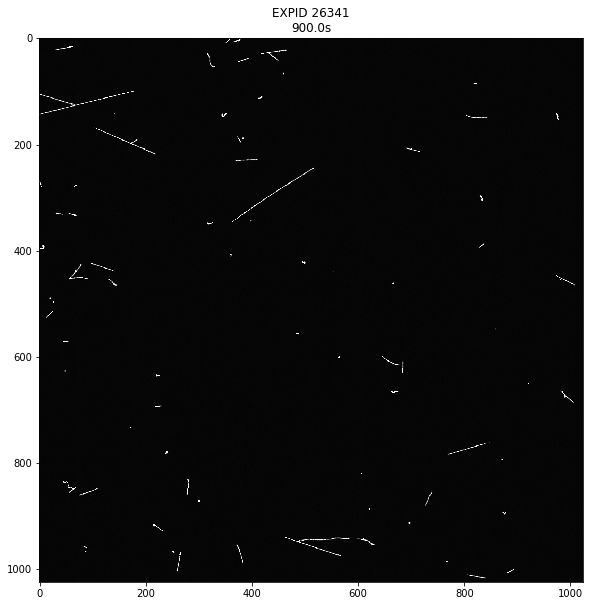

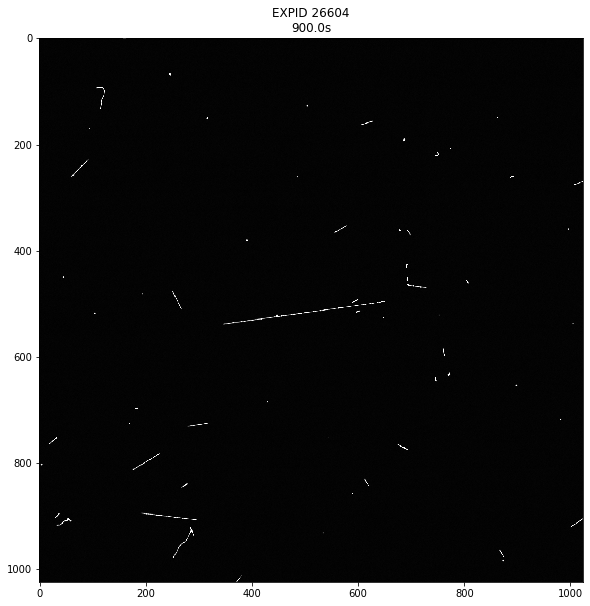

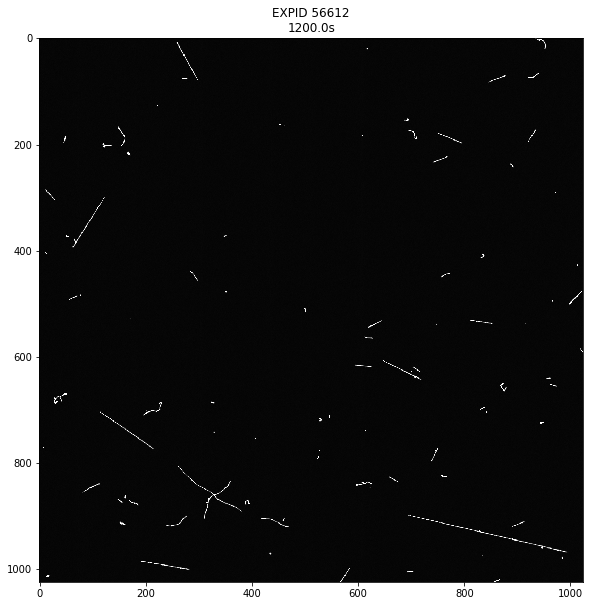

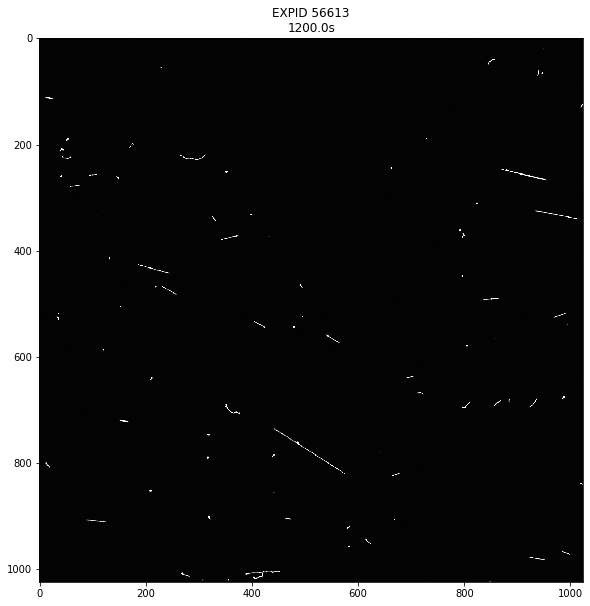

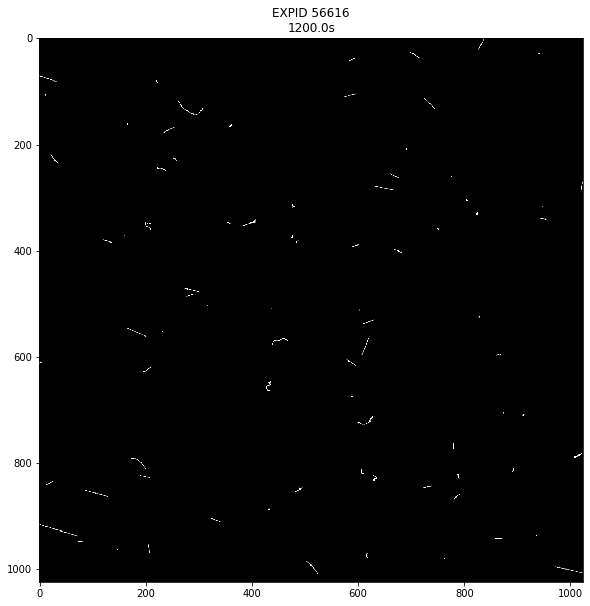

In [92]:
for i,f_name in enumerate(f_list):
    if i == 0: continue
    else:
        with fits.open(path+f_name) as hdul:
        #     print(hdul.info())
        #     print(repr(hdul[1].header))
        #     print(repr(hdul[2].header))
            hdr = hdul[1].header
            exptime = hdr['EXPTIME']
            expid = hdr['EXPID']
            print(hdul[2].data.min(),hdul[2].data.max())
            plt.figure(figsize= (10,10))
            plt.title(f'EXPID {expid}\n{exptime}s')
            plt.imshow(hdul[2].data[40:1064,40:1064], cmap = 'gray', vmin = 1956, vmax = 2500)
            plt.savefig(f'{expid}_{exptime}.pdf', format = 'pdf')